In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import os, glob
from datetime import timedelta
from datetime import datetime
import seaborn as sns

In [2]:
os.chdir('/data/dhence/a/pborse2/inputdata/strmflw_dis')
dis = [pd.read_csv(i).drop('Unnamed: 0',axis=1) for i in glob.glob('*.csv')]

In [3]:
from ipynb.fs.defs.Mosquitodataset1_Yearlybatchdata import yearlyfile, batchdf1

In [4]:
os.chdir('/data/dhence/a/pborse2/inputdata/Mosquito data')
mos = yearlyfile("Mosquito yearly.xlsx",'U-C')[0]
mosyr = yearlyfile("Mosquito yearly.xlsx",'U-C')[1]
batchdf = batchdf1(mos)

<AxesSubplot:ylabel='batches'>

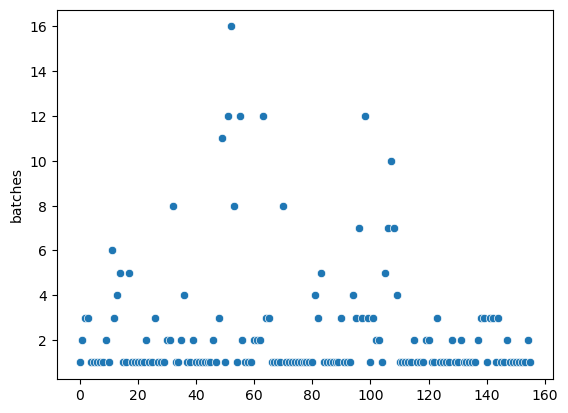

In [14]:
sns.scatterplot(batchdf['batches'])

In [26]:
pd.to_datetime(dis[1]['date'])

0      2001-12-24
1      2001-12-25
2      2001-12-26
3      2001-12-27
4      2001-12-28
          ...    
7583   2022-09-28
7584   2022-09-29
7585   2022-09-30
7586   2022-10-01
7587   2022-10-02
Name: date, Length: 7588, dtype: datetime64[ns]

In [5]:
for i in range(1,43):
    d = batchdf['date']-timedelta(i)
    batchdf['lagday-'+str(i)] = dis[1][pd.to_datetime(dis[1]['date']).isin(d)][dis[1].columns[1]].values

In [26]:
dis[2]

,date,USGS:05590050-peak q
0,2005-06-02,3.30
1,2005-06-03,4.30
2,2005-06-04,3.30
3,2005-06-05,3.30
4,2005-06-06,3.60
...,...,...
6327,2022-09-28,1.86
6328,2022-09-29,1.24
6329,2022-09-30,1.24
6330,2022-10-01,1.53


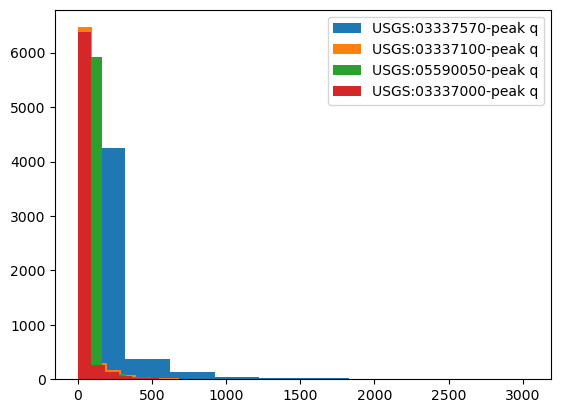

In [31]:
for i in dis:
    plt.hist(i[i.columns[1]])
plt.legend([i.columns[1] for i in dis])

Text(0, 0.5, 'frequency')

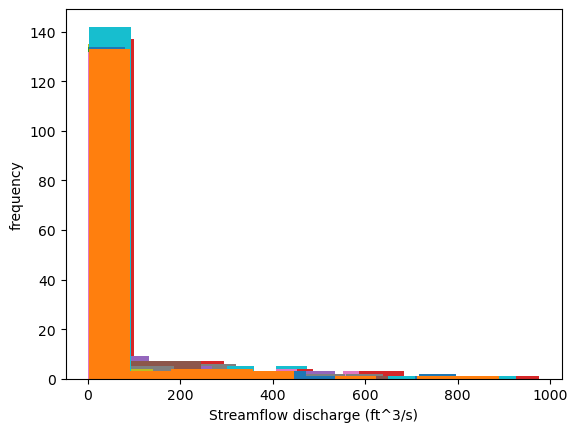

In [33]:
for i in batchdf.columns[3:]: ##Histograms for all lagdays for gage on boneyard creek
    plt.hist(batchdf[i])
plt.xlabel('Streamflow discharge (ft^3/s)')
plt.ylabel('frequency')

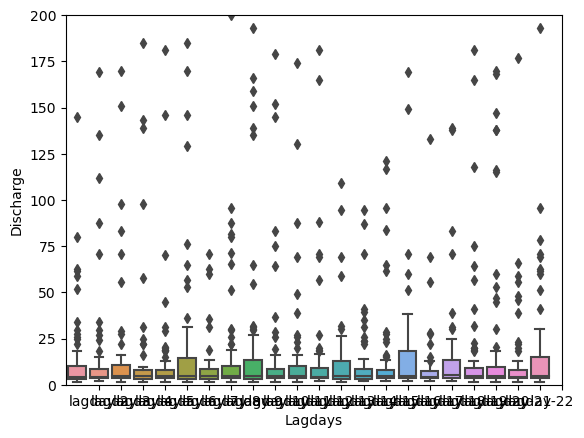

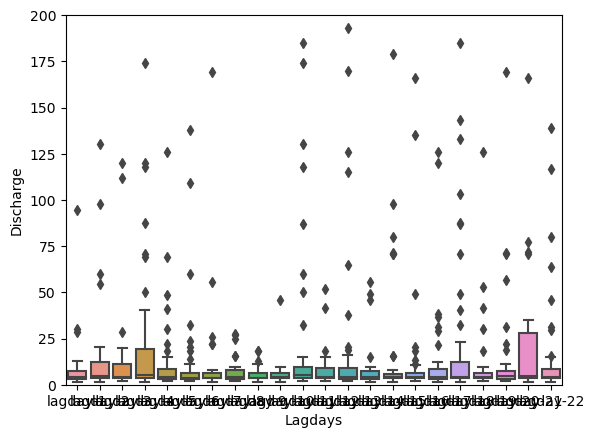

Text(0.5, 0, 'Lagdays')

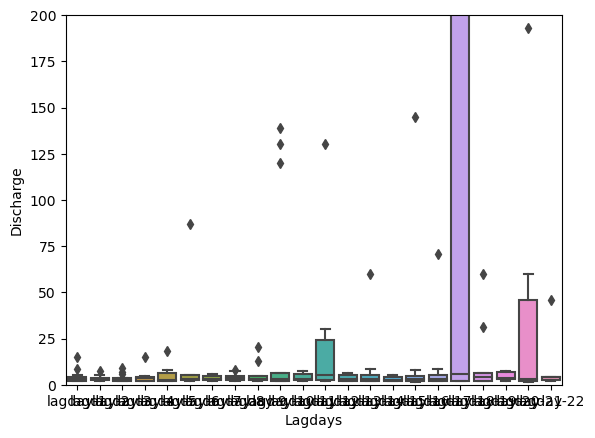

In [41]:

sns.boxplot(batchdf[batchdf['batches']==1][batchdf.columns[3:25]])
plt.ylim(0,200)
plt.ylabel('Discharge')
plt.xlabel('Lagdays')
plt.xticks(range(1,23))
plt.show()
sns.boxplot(batchdf[(batchdf['batches']>=2) & (batchdf['batches']<=5)][batchdf.columns[3:25]])
plt.ylim(0,200)
plt.ylabel('Discharge')
plt.xlabel('Lagdays')
plt.show()
sns.boxplot(batchdf[batchdf['batches']>=6][batchdf.columns[3:25]])
plt.ylim(0,200)
plt.ylabel('Discharge')
plt.xlabel('Lagdays')